# Image Filtering using FFT

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def plotImFFT(f):
    F = np.fft.fft2(f)
    F = np.fft.fftshift(F)
    plt.subplot(1,2,1)
    plt.imshow(f)
    plt.subplot(1,2,2)
    plt.imshow(abs(F))
    plt.xticks(np.arange(0, 200, 50), np.arange(-100, 100, 50))
    plt.yticks(np.arange(0, 200, 50), np.arange(-100, 100, 50))

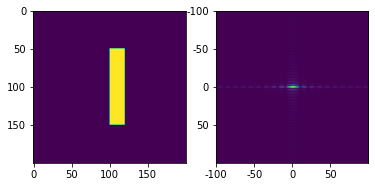

In [12]:
f = np.zeros((200,200))
f[50:150,100:120] = 1
plotImFFT(f)

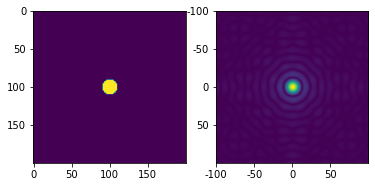

In [25]:
f = np.zeros((200,200))
x, y = np.linspace(0,199,200), np.linspace(0,199,200)
xv, yv = np.meshgrid(x,y)
xc, yc = 100, 100
ind = (xv-xc)**2+(yv-yc)**2<100
f[ind] = 1
plotImFFT(f)

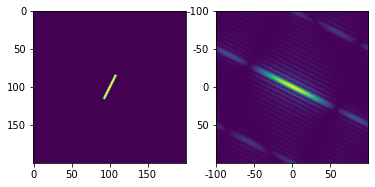

In [29]:
f = np.zeros((200,200))
x, y = np.linspace(0,199,200), np.linspace(0,199,200)
xv, yv = np.meshgrid(x,y)
xc, yc = 100, 100
ind = (abs(2*(xv-xc)+(yv-yc))<4)*(abs((xv-xc)-2*(yv-yc))<40)
f[ind] = 1
plotImFFT(f)

## Steps:

1. Pad the image with zeros
2. Center the transform
3. Compute DFT of the image $F(u,v)$
4. Multiply with the filter function $H(u,v)$
5. Shift back in the frequency domain
6. Extract the image from the padded image

In [30]:
f = plt.imread('rubiks.png')

In [37]:
def plotImFFT2(f):
    F = np.fft.fft2(f)
    F = np.fft.fftshift(F)
    plt.subplot(1,2,1)
    plt.imshow(f)
    plt.subplot(1,2,2)
    plt.imshow(np.log(abs(F)))
    plt.xticks(np.arange(0, 200, 50), np.arange(-100, 100, 50))
    plt.yticks(np.arange(0, 200, 50), np.arange(-100, 100, 50))

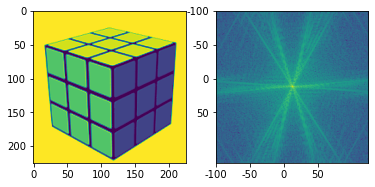

In [39]:
plotImFFT2(f[:,:,0])

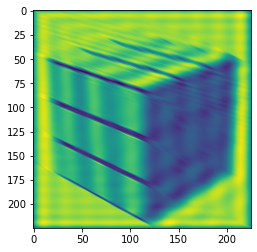

In [69]:
h = f[:,:,0]
m, n = h.shape
h = np.pad(h, ((m, 0), (n, 0)), 'constant', constant_values=0)
F = np.fft.fft2(h)
F = np.fft.fftshift(F)
H = np.zeros((2*m, 2*n))
x, y = np.linspace(0,2*m-1,2*m), np.linspace(0,2*n-1,2*n)
xv, yv = np.meshgrid(x,y)
xc, yc = m, n
#ind = (abs((xv-xc)**2+(yv-yc)**2)<10000)
ind = (abs(2*(xv-xc)+(yv-yc))<40)#*(abs((xv-xc)-2*(yv-yc))<40)
H[ind] = 1
F = F*H
F = np.fft.ifftshift(F)
h2 = np.fft.ifft2(F)
h2 = h2[m:,n:]
plt.imshow(np.real(h2))

* Low pass filter: mainly for getting the shape of the objects in the image, denoising the image, blur the image
* High pass filter: mainly for making the image more sharp, and getting the outlines of the objects inside the image. 

Some commonly used filters:

* Ideal filter
* Butterworth filter
* Gaussian filter